<a href="https://colab.research.google.com/github/durgakvm02/ybi-foundation--Hand_Written_Digital-Prediction-Classification_Analysis/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
!pip install pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Import data

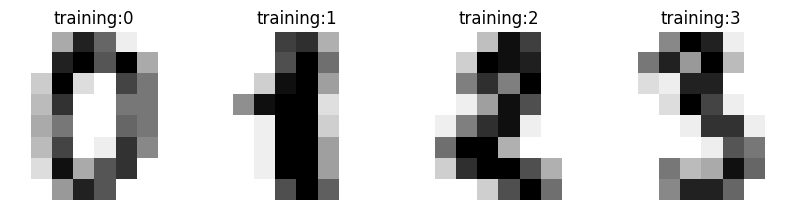

In [103]:
from sklearn.datasets import load_digits
df=load_digits()
_, axes=plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax,image,label in zip(axes,df.images,df.target):
    ax.set_axis_off()
    ax.imshow(image,cmap=plt.cm.gray_r,interpolation="nearest")
    ax.set_title("training:%i"%label)

Data Processing

In [104]:
df.images.shape

(1797, 8, 8)

In [105]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [106]:
df.images[0].shape

(8, 8)

In [107]:
len(df.images)

1797

In [108]:
n_samples=len(df.images)
data=df.images.reshape((n_samples,-1))

In [109]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [110]:
data[0].shape

(64,)

In [111]:
data.shape

(1797, 64)

Scaling image data

In [112]:
data.max()

16.0

In [113]:
data=data/16
data.min()

0.0

In [114]:
data.max()

1.0

In [115]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

Train Test Split Data

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
x_train ,x_test,y_train,y_test =train_test_split(data, df.target, test_size=0.3)

In [118]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

Random Forest Model

In [119]:
from sklearn.ensemble import RandomForestClassifier

In [120]:
rf=RandomForestClassifier()

In [121]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

Predict Test Data

In [122]:
y_pred=rf.predict(x_test)

In [123]:
y_pred

array([3, 8, 8, 1, 7, 6, 7, 2, 0, 8, 1, 0, 9, 9, 2, 8, 9, 1, 8, 1, 1, 4,
       5, 7, 2, 4, 5, 2, 0, 6, 8, 9, 1, 9, 7, 1, 5, 1, 6, 4, 3, 0, 2, 0,
       3, 3, 1, 8, 5, 2, 2, 9, 2, 3, 8, 3, 1, 0, 8, 0, 6, 0, 4, 4, 3, 6,
       4, 4, 6, 4, 2, 6, 6, 5, 8, 2, 4, 7, 9, 5, 1, 2, 1, 3, 1, 9, 5, 1,
       5, 1, 7, 6, 2, 7, 0, 5, 5, 0, 6, 7, 0, 5, 6, 1, 5, 0, 5, 1, 5, 5,
       8, 1, 2, 2, 4, 1, 0, 3, 2, 9, 7, 0, 8, 8, 7, 3, 7, 7, 2, 5, 7, 7,
       1, 4, 3, 4, 8, 7, 6, 3, 5, 8, 4, 9, 0, 3, 2, 8, 8, 4, 1, 0, 7, 6,
       4, 6, 6, 8, 5, 3, 1, 4, 5, 3, 8, 8, 9, 2, 2, 5, 3, 8, 3, 7, 3, 8,
       2, 9, 3, 1, 6, 1, 6, 9, 0, 7, 3, 7, 1, 3, 8, 9, 4, 4, 3, 9, 8, 0,
       6, 3, 0, 2, 2, 0, 6, 9, 7, 2, 7, 8, 6, 1, 3, 3, 4, 8, 2, 9, 6, 0,
       9, 9, 7, 4, 3, 6, 4, 3, 4, 0, 5, 7, 1, 4, 8, 4, 0, 9, 5, 3, 3, 1,
       4, 9, 6, 5, 5, 5, 6, 6, 3, 8, 6, 5, 9, 5, 0, 2, 4, 0, 1, 8, 5, 4,
       6, 7, 1, 4, 2, 6, 0, 7, 4, 3, 4, 9, 7, 0, 4, 5, 7, 7, 6, 3, 5, 0,
       4, 6, 8, 9, 9, 7, 8, 9, 1, 0, 8, 9, 8, 5, 6,

Model Accuracy

In [124]:
from sklearn.metrics import confusion_matrix,classification_report

In [125]:
confusion_matrix(y_test,y_pred)

array([[58,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 62,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 51,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0, 51,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 44,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  1,  0, 48,  1,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  1, 56,  0,  1,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 53,  0,  1],
       [ 0,  1,  0,  0,  1,  0,  0,  0, 53,  0],
       [ 0,  0,  0,  2,  0,  1,  0,  0,  1, 46]])

In [126]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        59
           1       0.97      1.00      0.98        62
           2       1.00      0.98      0.99        52
           3       0.94      0.96      0.95        53
           4       0.94      0.98      0.96        45
           5       0.96      0.94      0.95        51
           6       0.98      0.97      0.97        58
           7       0.96      0.96      0.96        55
           8       0.95      0.96      0.95        55
           9       0.98      0.92      0.95        50

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540

